In [0]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import json
from collections import Counter


# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle

In [0]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
column_names = []
tweets_df =  pd.DataFrame(columns = column_names)
tweets_df

""


In [0]:
try:
  tweets_df = pd.read_csv('/content/2020-03-12 Coronavirus Tweets.CSV')
except:
  None


In [0]:
tweets_df

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1237891051894996992,132225222,2020-03-12T00:00:00Z,SSalud_mx,¿Por qué #LavarteLasManos? Infórmate en el mic...,TweetDeck,NaN,NaN,NaN,False,False,3924.0,62.0,NaN,NaN,NaN,632579.0,206.0,NaN,2010-04-12T16:53:45Z,True,es
1,1237891051312033792,37950212,2020-03-12T00:00:00Z,ThaiPBS,6 ข้อดีการใช้ #หน้ากากผ้า ทางเลือกคนไม่ป่วย \n...,TweetDeck,NaN,NaN,NaN,False,False,2610.0,92.0,NaN,NaN,NaN,2786831.0,183.0,NaN,2009-05-05T15:48:26Z,True,th
2,1237891051261739009,15872418,2020-03-12T00:00:00Z,ABSCBNNews,Narito ang alert level na ginagamit ng Departm...,TweetDeck,NaN,NaN,NaN,False,False,1068.0,103.0,NaN,NaN,NaN,6697909.0,1075.0,NaN,2008-08-16T10:09:33Z,True,tl
3,1237891051249184768,860252856829587457,2020-03-12T00:00:00Z,IMSS_SanLuis,"Con manos limpias, seguro estarás mejor. #Cinc...",TweetDeck,NaN,NaN,NaN,False,False,300.0,0.0,NaN,NaN,NaN,942.0,41.0,NaN,2017-05-04T22:00:38Z,False,es
4,1237891051903307778,92174767,2020-03-12T00:00:00Z,DZMMTeleRadyo,Tinanggihan ng ilang miyembro ng Kamara na isa...,TweetDeck,NaN,NaN,NaN,False,False,573.0,2.0,NaN,NaN,NaN,1336680.0,161.0,NaN,2009-11-24T02:03:16Z,True,tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111998,1238021004250710017,1144988946428022784,2020-03-12T08:36:23Z,PastorChojecki,"To nie wariactwo, jest znacznie gorzej! To #Ka...",Twitter for Android,NaN,NaN,NaN,True,False,6212.0,10.0,NaN,NaN,NaN,958.0,272.0,NaN,2019-06-29T15:20:12Z,False,pl
111999,1238021005509001217,1550357791,2020-03-12T08:36:23Z,rilentoxicated,Long live #Covid_19...attack our colonial mast...,Twitter for iPhone,NaN,NaN,NaN,False,False,661.0,0.0,KE,"Kiambu, Kenya",city,155.0,639.0,NaN,2013-06-27T10:49:43Z,False,en
112000,1238021008172482560,163812745,2020-03-12T08:36:24Z,deadrising06,@SibethNdiaye honte à vous pour les propos env...,Twitter for Android,NaN,374438368.0,SibethNdiaye,False,False,1012.0,0.0,NaN,NaN,NaN,424.0,642.0,NaN,2010-07-07T10:08:39Z,False,fr
112001,1238021011498364928,17830429,2020-03-12T08:36:25Z,sakaltimes,Pandemic means every person on Earth is prone ...,Twitter for Android,NaN,NaN,NaN,False,False,323.0,0.0,IN,"Pune, India",city,19195.0,10.0,NaN,2008-12-03T05:54:15Z,False,en


In [0]:

print(len(tweets_df))
tweets_df.head()

112003


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1237891051894996992,132225222,2020-03-12T00:00:00Z,SSalud_mx,¿Por qué #LavarteLasManos? Infórmate en el mic...,TweetDeck,NaN,NaN,NaN,False,False,3924.0,62.0,NaN,NaN,NaN,632579.0,206.0,NaN,2010-04-12T16:53:45Z,True,es
1,1237891051312033792,37950212,2020-03-12T00:00:00Z,ThaiPBS,6 ข้อดีการใช้ #หน้ากากผ้า ทางเลือกคนไม่ป่วย \n...,TweetDeck,NaN,NaN,NaN,False,False,2610.0,92.0,NaN,NaN,NaN,2786831.0,183.0,NaN,2009-05-05T15:48:26Z,True,th
2,1237891051261739009,15872418,2020-03-12T00:00:00Z,ABSCBNNews,Narito ang alert level na ginagamit ng Departm...,TweetDeck,NaN,NaN,NaN,False,False,1068.0,103.0,NaN,NaN,NaN,6697909.0,1075.0,NaN,2008-08-16T10:09:33Z,True,tl
3,1237891051249184768,860252856829587457,2020-03-12T00:00:00Z,IMSS_SanLuis,"Con manos limpias, seguro estarás mejor. #Cinc...",TweetDeck,NaN,NaN,NaN,False,False,300.0,0.0,NaN,NaN,NaN,942.0,41.0,NaN,2017-05-04T22:00:38Z,False,es
4,1237891051903307778,92174767,2020-03-12T00:00:00Z,DZMMTeleRadyo,Tinanggihan ng ilang miyembro ng Kamara na isa...,TweetDeck,NaN,NaN,NaN,False,False,573.0,2.0,NaN,NaN,NaN,1336680.0,161.0,NaN,2009-11-24T02:03:16Z,True,tl


In [0]:
text_lang_df = tweets_df1[['text', 'lang']]
text_lang_df.head()

,text,lang
0,"Nearly 100,000 coronavirus cases in US: tracke...",en
1,'Like wartime': Filipino doctors overwhelmed b...,en
2,Catarman isinailalim sa enhanced community qua...,tl
3,#Toquedequeda A partir de las 22:00 horas y ha...,es
4,"La mortalidad por el #COVID19 es baja, es impo...",es


In [0]:
text_en = text_lang_df[text_lang_df['lang'] == 'en'].reset_index()['text']
print(len(text_en))
text_en.head()

310848


0    Nearly 100,000 coronavirus cases in US: tracke...
1    'Like wartime': Filipino doctors overwhelmed b...
2    Correspondence: Epidemiology of Covid-19. #COV...
3    Advocates have long argued that a safe supply ...
4    Amid the #COVID19 pandemic, the @BCTruckingAss...
Name: text, dtype: object

In [0]:
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", x))
text_en_lr.head()

0    Nearly 100,000 coronavirus cases in US: tracke...
1    'Like wartime': Filipino doctors overwhelmed b...
2    Correspondence: Epidemiology of Covid-19. #COV...
3    Advocates have long argued that a safe supply ...
4    Amid the #COVID19 pandemic, the @BCTruckingAss...
Name: text, dtype: object

In [0]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head()

0    nearly 100,000 coronavirus cases in us: tracke...
1    'like wartime': filipino doctors overwhelmed b...
2    correspondence: epidemiology of covid-19. #cov...
3    advocates have long argued that a safe supply ...
4    amid the #covid19 pandemic, the @bctruckingass...
Name: text, dtype: object

In [0]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_en_lr_lc_pr.head()

0    nearly 100000 coronavirus cases in us tracker ...
1    like wartime filipino doctors overwhelmed by c...
2    correspondence epidemiology of covid19 covid19...
3    advocates have long argued that a safe supply ...
4    amid the covid19 pandemic the bctruckingassoc ...
Name: text, dtype: object

In [0]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp'])

text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_en_lr_lc_pr_sr.head()

0    nearly 100000 coronavirus cases us tracker cov...
1    like wartime filipino doctors overwhelmed covi...
2    correspondence epidemiology covid19 covid19 sa...
3    advocates long argued safe supply would reduce...
4    amid covid19 pandemic bctruckingassoc says can...
Name: text, dtype: object

In [0]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list

['nearly',
 '100000',
 'coronavirus',
 'cases',
 'us',
 'tracker',
 'covid19',
 'like',
 'wartime',
 'filipino',
 'doctors',
 'overwhelmed',
 'covid19',
 'deluge',
 'correspondence',
 'epidemiology',
 'covid19',
 'covid19',
 'sarscov2',
 'advocates',
 'long',
 'argued',
 'safe',
 'supply',
 'would',
 'reduce',
 'overdose',
 'deaths',
 '—',
 'call',
 'urgent',
 'ever',
 'amid',
 'covid19',
 'crisis',
 'vanpoli',
 'cdnpoli',
 'amid',
 'covid19',
 'pandemic',
 'bctruckingassoc',
 'says',
 'canadas',
 'supply',
 'chains',
 'remain',
 'healthy',
 'british',
 'charity',
 'teamed',
 'scientists',
 'see',
 'whether',
 'dogs',
 'could',
 'help',
 'detect',
 'covid19',
 'keen',
 'sense',
 'smell',
 'coronavirusupdate',
 'halifax',
 'gp',
 'dr',
 'sundeep',
 'chohan',
 'trained',
 'catastrophe',
 'medicine',
 'concerned',
 '5',
 'million',
 'canadians',
 'without',
 'family',
 'doctor',
 'risk',
 'covid19',
 'suggests',
 'consider',
 'pandemic',
 'opportunity',
 'fix',
 'healthcare',
 'system',
 

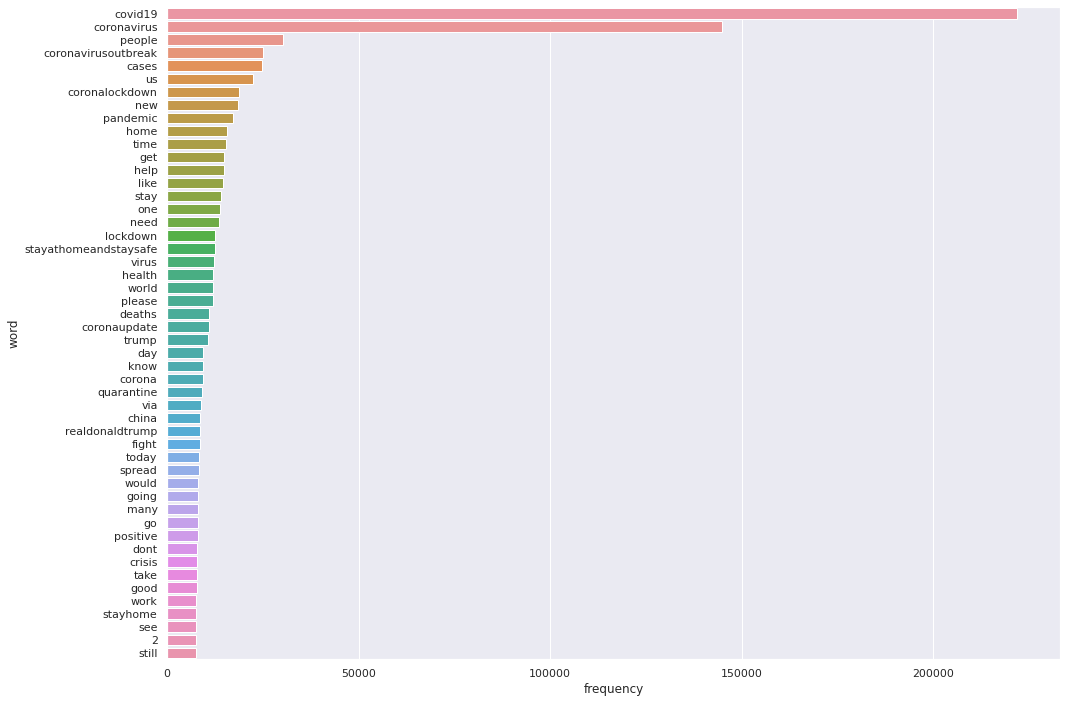

In [0]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (16, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

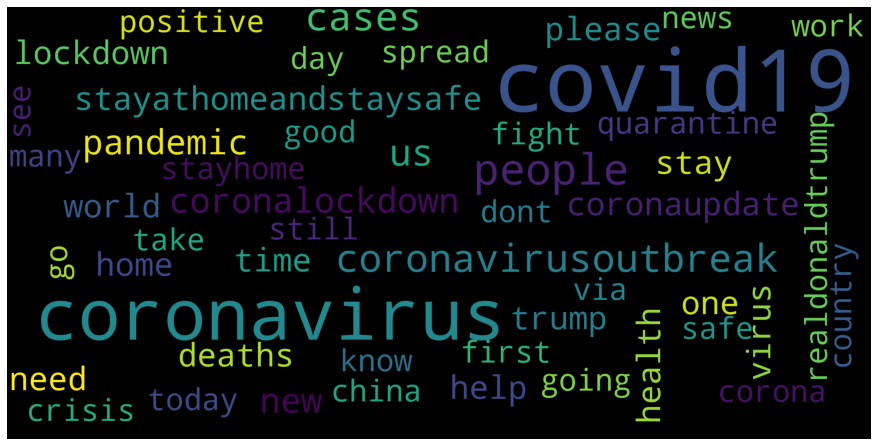

In [0]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')


In [0]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = text_en_lr_lc_pr_sr.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.575,0.425,0.4019
2,0.000,1.000,0.000,0.0000
3,0.272,0.535,0.193,-0.4404
4,0.000,0.769,0.231,0.4019


In [0]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

,neg,neu,pos,compound,val
0,0.000,1.000,0.000,0.0000,neutral
1,0.000,0.575,0.425,0.4019,positive
2,0.000,1.000,0.000,0.0000,neutral
3,0.272,0.535,0.193,-0.4404,negative
4,0.000,0.769,0.231,0.4019,positive


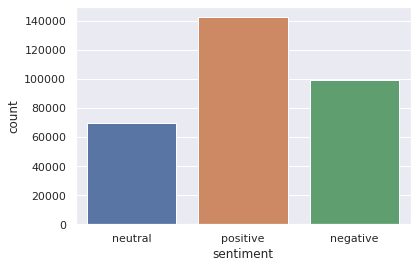

In [0]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')